# Car Detection -- Use ONNX for Inference (model exported from fastai)

In [27]:
import onnxruntime as rt
from PIL import Image
import numpy as np

加载模型

In [30]:
sess = rt.InferenceSession("models/car_detection_model_fixed_optv1.onnx")

In [31]:
inp = sess.get_inputs()

In [32]:
inpname = inp[0].name

In [33]:
inpname

'image_1_3_800_800'

打开并查看图片

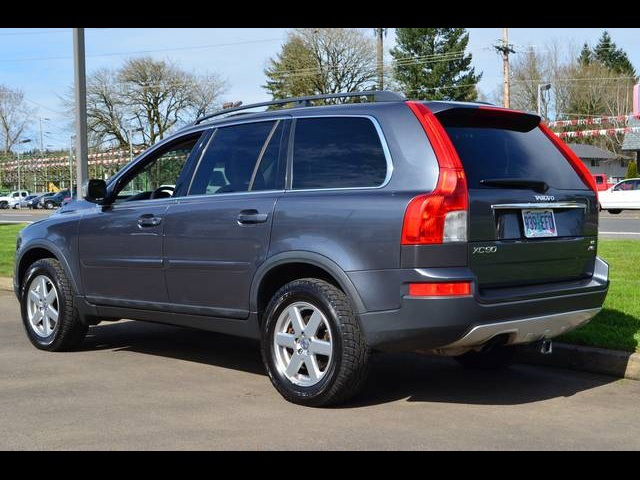

In [34]:
raw_img = Image.open("example_images/00028.jpg")
raw_img

图片预处理(缩放到800—800，再转换为 1_3_800_800 并 normailize)

In [35]:
img = np.transpose(np.array(raw_img.resize((800,800)), dtype="float32"),(2,0,1))[np.newaxis,:]/255

获得预测结果

In [36]:
boxes, classes, probs = sess.run(None, {inpname: img})

使用 PIL 进行预测结果可视化

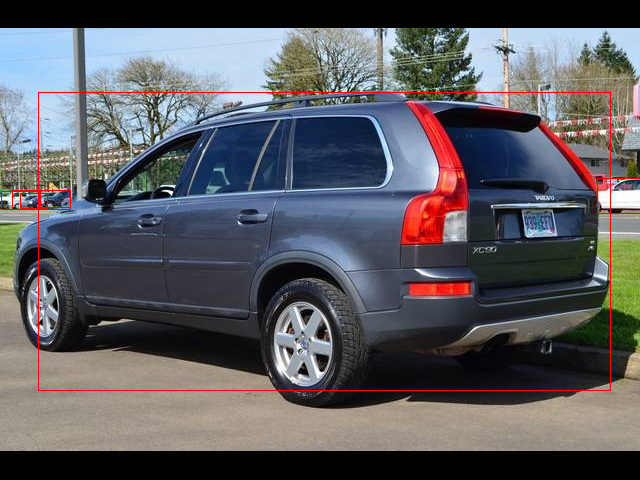

In [37]:
from PIL import Image, ImageDraw
dimg = Image.open("example_images/00028.jpg")
draw = ImageDraw.Draw(dimg)
for i in range(6):
    box = boxes[i]
    boxc = ((box[0]*dimg.width/800, box[1]*dimg.height/800), (box[2]*dimg.width/800, box[3]*dimg.height/800))
    draw.rectangle(boxc, outline="red")
dimg